In [2]:
import numpy as np
import pandas as pd
import altair as alt
import os as os
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
os.getcwd()

'/home/dkruszew/Documents/labs/DSCI-532-Group108/scr'

In [6]:
df = pd.read_csv('../data/crimedata_csv_all_years.csv')

In [7]:
df_line = df.query('TYPE == "Break and Enter Commercial"').groupby(['YEAR']).count().reset_index()

In [8]:
df_line.head()

,YEAR,TYPE,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,2003,3197,3197,3197,3197,3197,3197,3197,3197,3197
1,2004,3283,3283,3283,3283,3283,3283,3283,3283,3283
2,2005,2639,2639,2639,2639,2639,2639,2638,2639,2639
3,2006,2844,2844,2844,2844,2844,2844,2844,2844,2844
4,2007,2436,2436,2436,2436,2436,2436,2434,2436,2436


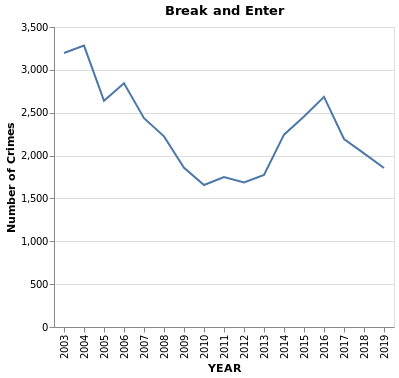

In [9]:
alt.Chart(df_line).mark_line().encode(
    alt.X('YEAR:O'),
    alt.Y('TYPE:Q', title='Number of Crimes')
).properties(
title='Break and Enter')

In [39]:
(pd.DataFrame({'district':df['NEIGHBOURHOOD'].unique()})).sort_values('district').reset_index()

,index,district
0,18,Arbutus Ridge
1,3,Central Business District
2,21,Dunbar-Southlands
3,1,Fairview
4,6,Grandview-Woodland
5,4,Hastings-Sunrise
6,8,Kensington-Cedar Cottage
7,16,Kerrisdale
8,20,Killarney
9,7,Kitsilano


In [178]:
df = pd.read_csv('../data/crimedata_csv_all_years.csv')

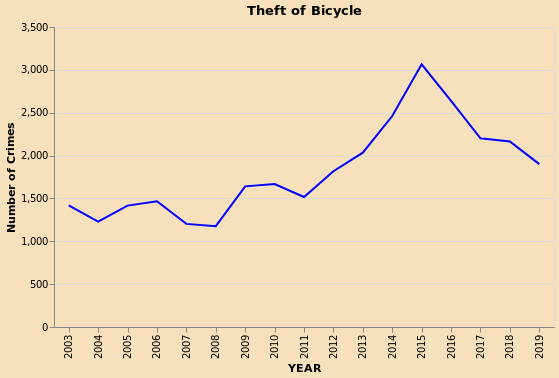

In [195]:
time_scale = "YEAR"
crime = "Theft of Bicycle"
neighbourhood = "ALL"

if neighbourhood != "ALL":
    if crime != "ALL":
        df_line = df.query('TYPE == @crime & NEIGHBOURHOOD == @neighbourhood').groupby([time_scale]).count().reset_index()
    else:    
        df_line = df.query('NEIGHBOURHOOD == @neighbourhood').groupby([time_scale]).count().reset_index()
else:
    if crime != "ALL":
        df_line = df.query('TYPE == @crime').groupby([time_scale]).count().reset_index()
    else:
        df_line = df.groupby([time_scale]).count().reset_index() 
    
alt.Chart(df_line).mark_line().encode(
    alt.X(time_scale+':N'),
    alt.Y('TYPE:Q', title='Number of Crimes'),
    alt.Color(value="blue")
).configure_axisX(
    labelAngle=90,
    grid=True
).configure(
    background='#f7e0bc' #HEX color code
).properties(
height=300,
width=500,
title=crime
)

In [112]:
df['TYPE'].unique()

array(['Break and Enter Commercial', 'Break and Enter Residential/Other',
       'Homicide', 'Mischief', 'Offence Against a Person', 'Other Theft',
       'Theft from Vehicle', 'Theft of Bicycle', 'Theft of Vehicle',
       'Vehicle Collision or Pedestrian Struck (with Fatality)',
       'Vehicle Collision or Pedestrian Struck (with Injury)'],
      dtype=object)